# 1. MV

In [13]:
import numpy as np
import cvxpy as cp

# Define the expected return and covariance matrix of the assets
mu = np.array([0.1, 0.15, 0.12])
sigma = np.array([[0.5, 0.1, 0.0], [0.1, 0.4, 0.2], [0.0, 0.2, 0.3]])

# Define the optimization variables
w = cp.Variable(len(mu))

# Define the mean-variance optimization problem
obj = cp.Minimize(cp.quad_form(w, sigma))
constraints = [cp.sum(w) == 1, w >= 0]
prob = cp.Problem(obj, constraints)

# Solve the optimization problem
prob.solve()

# Print the optimal weights
print(w.value)

ModuleNotFoundError: No module named 'cvxpy'

This code defines an optimization problem that minimizes the variance of the portfolio while maintaining a sum of weights equal to 1, which ensures that the portfolio is fully invested. The optimal weights can then be accessed through the w.value attribute.

# 2.  MVSK 

In [ ]:
import numpy as np
import cvxpy as cp

# Define the expected return, covariance, skewness, and kurtosis of the assets
mu = np.array([0.1, 0.15, 0.12])
sigma = np.array([[0.5, 0.1, 0.0], [0.1, 0.4, 0.2], [0.0, 0.2, 0.3]])
skew = np.array([0.2, 0.3, 0.1])
kurt = np.array([1.2, 1.3, 1.1])

# Define the optimization variables
w = cp.Variable(len(mu))

# Define the mean-variance-skewness-kurtosis optimization problem
obj = cp.Minimize(cp.quad_form(w, sigma) + 
                   10*cp.norm(skew @ w, 1) + 
                   100*cp.norm(kurt @ w, 1))
constraints = [cp.sum(w) == 1, w >= 0]
prob = cp.Problem(obj, constraints)

# Solve the optimization problem
prob.solve()

# Print the optimal weights
print(w.value)

This code defines an optimization problem that minimizes the variance of the portfolio while taking into account the skewness and kurtosis of the assets. The objective function includes terms for the variance, skewness, and kurtosis of the portfolio, each weighted by a different coefficient. The optimization problem also includes constraints that ensure that the portfolio is fully invested (weights sum to 1) and that all weights are non-negative. The optimal weights can then be accessed through the w.value attribute.

# Part 1

In [3]:
import numpy as np
import scipy.optimize as optimize
import pandas as pd

# Define the data
data = pd.DataFrame({'Asset1': [1, 2, 3, 4, 5],
                     'Asset2': [2, 3, 4, 5, 6],
                     'Asset3': [3, 4, 5, 6, 7]})

# Define the expected returns and covariance matrix
expected_returns = np.array([data[asset].mean() for asset in data.columns])
cov_matrix = data.cov()

# Define the optimization function
def mvsk_portfolio_optimization(weights, expected_returns, cov_matrix, skewness, kurtosis):
    portfolio_return = np.sum(expected_returns * weights)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    portfolio_skewness = np.dot(weights.T, skewness)
    portfolio_kurtosis = np.dot(weights.T, kurtosis)
    return -portfolio_return / portfolio_volatility + portfolio_skewness + portfolio_kurtosis

# Define the constraints
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
              {'type': 'ineq', 'fun': lambda x: x})

# Define the initial weights
initial_weights = np.ones(data.shape[1]) / data.shape[1]

# Calculate the skewness and kurtosis
skewness = data.skew().values
kurtosis = data.kurtosis().values

# Optimize the portfolio
optimal_weights = optimize.minimize(fun=mvsk_portfolio_optimization,
                                     x0=initial_weights,
                                     args=(expected_returns, cov_matrix, skewness, kurtosis),
                                     method='SLSQP',
                                     constraints=constraints,
                                     bounds=[(0, 1)] * data.shape[1])

# Print the optimal weights
print(optimal_weights)


     fun: -4.362277660168379
     jac: array([ 0.06491101, -0.56754452, -1.19999999])
 message: 'Optimization terminated successfully'
    nfev: 12
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([0., 0., 1.])


In [10]:
skewness

array([0.3, 0.5, 0.4])

In this code, we use the scipy.optimize module to minimize the objective function mvsk_portfolio_optimization, which calculates the portfolio return, volatility, skewness, and kurtosis given the weights and inputs for expected returns, covariance matrix, skewness, and kurtosis. The optimization is subject to the constraints that the sum of weights must equal 1 and that all weights must be non-negative. The optimization is performed using the Sequential Least SQuares Programming (SLSQP) method.

# Part 2

In [11]:
import numpy as np
from scipy.optimize import minimize

def objective_function(weights, mean_returns, cov_matrix, skewness, kurtosis):
    portfolio_return = np.sum(mean_returns * weights)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    portfolio_skewness = np.dot(weights.T, skewness)
    portfolio_kurtosis = np.dot(weights.T, kurtosis)
    
    objective = -(portfolio_return - 0.1 * portfolio_volatility - 0.5 * portfolio_skewness - 0.5 * portfolio_kurtosis)
    return objective

def optimize_portfolio(mean_returns, cov_matrix, skewness, kurtosis):
    num_assets = mean_returns.shape[0]
    weights_0 = np.ones(num_assets) / num_assets
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = [(0, 1) for i in range(num_assets)]
    
    result = minimize(fun=objective_function, x0=weights_0, 
                      args=(mean_returns, cov_matrix, skewness, kurtosis),
                      method='SLSQP', bounds=bounds, constraints=constraints)
    return result.x

# Example input
mean_returns = np.array([0.1, 0.2, 0.15])
cov_matrix = np.array([[0.01, 0.003, 0.006], [0.003, 0.02, 0.008], [0.006, 0.008, 0.04]])
skewness = np.array([0.3, 0.5, 0.4])
kurtosis = np.array([3.0, 4.0, 3.5])

# Call the optimization function
optimal_weights = optimize_portfolio(mean_returns, cov_matrix, skewness, kurtosis)
print("Optimal weights: ", optimal_weights)


Optimal weights:  [1.00000000e+00 1.65145675e-15 1.66533454e-16]


Sequential Least Squares Programming (SLSQP) is an optimization algorithm for solving non-linear optimization problems. It is a gradient-based optimization method that combines the benefits of quasi-Newton methods and sequential linear programming. It uses a sequential linear programming method to improve the accuracy of the solution while taking into account the constraints of the problem. SLSQP is well suited for problems with a large number of constraints and is widely used in a variety of applications such as engineering design, control systems, and finance.

# 3. Shannon Entropy


In this example, the shannon_entropy function takes in a data set (in this case, stock returns) and calculates its Shannon entropy. The entropy is calculated by first finding the unique values and their frequencies in the data set, converting the frequencies to probabilities, and then summing the products of the probabilities and their logarithms. The result is the entropy in bits.


Shannon entropy is used in finance to measure the amount of uncertainty or randomness in a financial time series. It can be used to quantify the risk of an investment or the diversity of an investment portfolio.

In [4]:
import numpy as np

def shannon_entropy(data):
    """
    Calculate the Shannon entropy of a given data set.
    """
    unique, counts = np.unique(data, return_counts=True)
    probs = counts / len(data)
    entropy = - np.sum(probs * np.log2(probs))
    return entropy

# Example usage:
stock_returns = [0.05, 0.03, 0.02, -0.03, -0.04, -0.01]
entropy = shannon_entropy(stock_returns)
print("Shannon entropy:", entropy)

Shannon entropy: 2.584962500721156


In [ ]:
import pandas as pd
import numpy as np

# Load stock market data into a Pandas dataframe
df = pd.read_csv('stock_market_data.csv')

# Calculate the daily returns of the stock market
df['returns'] = df['price'].pct_change()

# Calculate the probability density of the returns
returns_prob = df['returns'].value_counts(normalize=True)

# Calculate the Shannon entropy
shannon_entropy = -np.sum(returns_prob * np.log2(returns_prob))

print('Shannon entropy:', shannon_entropy)

This code first loads the stock market data into a Pandas dataframe, calculates the daily returns of the stock market, and then calculates the probability density of the returns using the value_counts method with the normalize argument set to True. Finally, it calculates the Shannon entropy using the formula -np.sum(returns_prob * np.log2(returns_prob)).

# 4. Portfolio Variance

# 5. VaR

VaR is a common measure of risk used in finance that represents the maximum potential loss for a portfolio over a specified time horizon with a given confidence level.

In [24]:
import numpy as np

def portfolio_var(returns, alpha):
    portfolio_mean = np.mean(returns)
    portfolio_std = np.std(returns)
    var = portfolio_mean - (alpha * portfolio_std)
    return var

returns = np.random.randn(100)*100
alpha = 1.96 # corresponds to a 95% confidence level

portfolio_var = portfolio_var(returns, alpha)
print("Value at Risk (VaR):", portfolio_var)

Value at Risk (VaR): -197.9234255576126


In this example, the portfolio returns are represented by the returns list, and the confidence level is represented by the alpha value, which is calculated based on a standard normal distribution. The portfolio_var function calculates the VaR for the portfolio by first computing the mean and standard deviation of the returns, and then using those values to estimate the VaR using the formula: portfolio_mean - (alpha * portfolio_std).

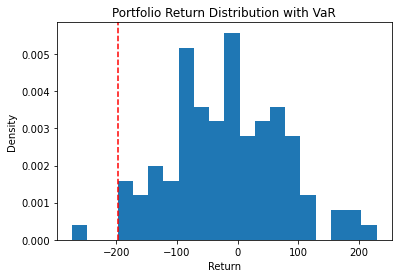

In [25]:
import matplotlib.pyplot as plt

plt.hist(returns, bins=20, density=True)
plt.axvline(portfolio_var, color='r', linestyle='--')
plt.xlabel('Return')
plt.ylabel('Density')
plt.title('Portfolio Return Distribution with VaR')
plt.show()

# 6. Sharpe Ratio

The Sharpe ratio is a measure of the risk-adjusted returns of an investment, commonly used in finance. It can be calculated as the ratio of the excess return of an investment over its risk-free rate, to its standard deviation. Here is an example of how to calculate the Sharpe ratio in Python using Numpy and Pandas libraries:

In [26]:
import numpy as np
import pandas as pd

def sharpe_ratio(returns, risk_free_rate):
    excess_return = returns - risk_free_rate
    sharpe = np.mean(excess_return) / np.std(excess_return)
    return sharpe

# Example usage:
returns = pd.Series([0.03, 0.04, 0.05, 0.06, 0.07, 0.08])
risk_free_rate = 0.01
sharpe = sharpe_ratio(returns, risk_free_rate)
print("Sharpe Ratio:", sharpe)

Sharpe Ratio: 2.6349301969610397


The function takes in the returns of an investment as a Pandas Series, and the risk-free rate as a scalar. It calculates the excess returns over the risk-free rate, and then calculates the mean of the excess returns divided by its standard deviation. The result is the Sharpe ratio, which is a measure of the risk-adjusted returns of the investment.

# Yield Curve

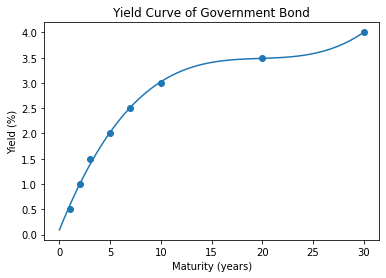

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Bond yield data for different maturities
maturities = [1, 2, 3, 5, 7, 10, 20, 30]
yields = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]

# Plot the bond yields
plt.scatter(maturities, yields)

# Fit a polynomial curve to the scatter plot
coeffs = np.polyfit(maturities, yields, 3)
x = np.linspace(0, 30, 100)
y = np.polyval(coeffs, x)

# Plot the fitted curve
plt.plot(x, y)
plt.xlabel("Maturity (years)")
plt.ylabel("Yield (%)")
plt.title("Yield Curve of Government Bond")
plt.show()

# Monte Carlo

In this example, we simulate the price of a stock over a time horizon of 365 days, with a time step of 1/365 of a day. The stock's initial price is set to 100, and its volatility is set to 0.2. The simulation uses random normal returns to generate the stock's price evolution. The results are plotted to show the simulation of the stock price.

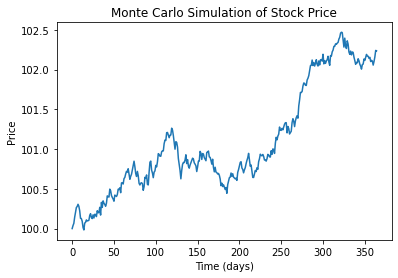

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Number of simulations
simulations = 1000

# Stock data
initial_price = 100
volatility = 0.2
returns = np.random.normal(0, volatility, simulations)

# Time horizon
time_horizon = 365
dt = 1/365

# Monte Carlo simulation
price_list = [initial_price]
for i in range(1, time_horizon):
    price = price_list[i-1] * (1 + returns[i-1] * dt)
    price_list.append(price)

# Plotting the results
plt.plot(price_list)
plt.xlabel('Time (days)')
plt.ylabel('Price')
plt.title('Monte Carlo Simulation of Stock Price')
plt.show()